<a href="https://colab.research.google.com/github/iotanalytics/IoTTutorial/blob/main/code/clustering_and_classification/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##EXTRA TREES CLASSIFICATION

From: **Towards Data Science**

*Modified: Stephen Coshatt*

<br/>

**References:**

1.   https://towardsdatascience.com/what-when-how-extratrees-classifier-c939f905851c
2.   https://www.baeldung.com/cs/random-forest-vs-extremely-randomized-trees
3.   https://blog.tdg.international/exploring-extra-trees-82d1e87c302a


</br>

##What is ExtraTrees models?

Similar to Random Forests, ExtraTrees is an ensemble ML approach that trains numerous decision trees and aggregates the results from the group of decision trees to output a prediction. However, there are few differences between Extra Trees and Random Forest.  [1]

Random Forest uses bagging to select different variations of the training data to ensure decision trees are sufficiently different. However, Extra Trees uses the entire dataset to train decision trees. As such, to ensure sufficient differences between individual decision trees, it RANDOMLY SELECTS the values at which to split a feature and create child nodes. In contrast, in a Random Forest, we use an algorithm to greedy search and select the value at which to split a feature. Apart from these two differences, Random Forest and Extra Trees are largely the same. So what effect do these changes have?  [1]

* Using the entire dataset (which is the default setting and can be changed) allows ExtraTrees to reduce the bias of the model. However, the randomization of the feature value at which to split, increases the bias and variance. The paper that introduced the Extra Trees model conducts a bias-variance analysis of different tree based models. From the paper we see on most classification and regression tasks (six were analyzed) ExtraTrees have higher bias and lower variance than Random Forest. However, the paper goes on to say this is because the randomization in extra trees works to include irrelevant features into the model. As such, when irrelevant feature were excluded, say via a feature selection pre-modelling step, Extra Trees get a bias score similar to that of Random Forest.  [1]

* In terms of computational cost, Extra Trees is much faster than Random Forest. This is because Extra Trees randomly selects the value at which to split features, instead of the greedy algorithm used in Random Forest.  [1]

##When should you use ExtraTrees?

Random Forest remains the go-to ensemble tree based model (with recent competition from XGBoost Models). However, from our prior discussion on the differences between Random Forest and Extra Trees, we see that ExtraTrees have value, especially when computational cost is a concern. **Specifically, when building models that have substantial feature engineering/feature selection pre-modelling steps, and computational cost is an issue ExtraTrees would be a good choice over other ensemble tree-based models.**  [1]

##Parameters

* **K** is the max_feature in Scikit-learn documentation and refers to the number of features to be considered at each decision node. The higher the value of K, more features are considered at each decision node, and hence lower the bias of the model. However, too high a value of K reduces randomization, negating the effect of the ensemble.
* **nmin** maps to min_sample_leaf, and is a minimum number of samples required to be at a leaf node. The higher its value, the less likely the model is to overfit. Smaller numbers of samples result in more splits and a deeper, more specialized tree.
* **M** maps to n_estimators, and is a number of trees in the forest. The higher its value, the lower the variance of the model.

## Takeaways

* ExtraTrees Classifier is an ensemble tree-based machine learning approach that uses relies on randomization to reduce variance and computational cost (compared to Random Forest).
* ExtraTrees Classifier can be used for classification or regression, in scenarios where computational cost is a concern and features have been carefully selected and analyzed.
* Extra Trees can be implemented from Scikit-learn. The three hyperparameters important for tuning are max_feature, min_samples_leaf, and n_estimators.


###Advantages
*   Reduction in bias. This is in terms of sampling from the entire dataset during the construction of the trees. Different subsets of the data may introduce different biases in the results obtained, hence Extra Trees prevents this by sampling the entire dataset. [2] [3]
*   Reduces Variance. This is a result of the randomized splitting of nodes within the decision trees, hence the algorithm is not heavily influenced by certain features or patterns in the dataset.  [2] [3]
*   One of the key advantages of extra trees is their computational efficiency. [3]
*   Robustness to Outliers and Noisy Data: Extra trees are less sensitive to outliers and noisy data, making them suitable for dealing with real-world datasets that often contain irregularities. [3]
*   Extra trees are particularly effective in handling high-dimensional datasets. [3]
*   Overfitting Prevention: Extra trees introduce additional randomness in the decision tree building process, which helps prevent overfitting and reduces model complexity. [3]
*   Fast Training: The use of random feature thresholds and randomized feature subspace selection accelerates the training process, making extra trees faster to train compared to traditional decision trees. [3]
*   High Accuracy: Despite their simplicity, extra trees can achieve high predictive accuracy, especially when trained on large datasets. [3]

###Disadvantages
*   Less interpretable. Extra Trees introduces additional randomness by selecting random subsets of features and splitting the nodes using random thresholds. This randomness helps reduce overfitting and improves performance. However, it also makes the resulting model less interpretable. [3]
*   Hyperparamater Tuning.  Small changes in parameters can lead to large changes in results [3]

In [1]:
!pip install sktime
!pip install tslearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.7/20.7 MB 33.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.4/122.4 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 369.8/369.8 kB 5.2 MB/s eta 0:00:00


In [4]:
from math import radians
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import read_csv
from pathlib import Path

#import streamlit as st

import re
import pytz
from datetime import datetime
from datetime import date

import enum
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, RocCurveDisplay, auc, roc_curve, roc_auc_score

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

In [3]:
# GET TIME SERIES DATASET
# steps 1, 2 - prepare osuleaf dataset (train and new)
from sktime.datasets import load_italy_power_demand

X_train, y_train = load_italy_power_demand(split="train", return_type="numpy2D")
X_test, y_test = load_italy_power_demand(split="test", return_type="numpy2D")

print("shape of X_train ",X_train.shape)
print("shape of y_train ",y_train.shape)
print("shape of X_test ",X_test.shape)
print("shape of y_test ",y_test.shape)

y_train = y_train.astype(int)
y_test = y_test.astype(int)

n_classes = int(np.amax(y_train))
print("number of classes is ",n_classes)

shape of X_train  (67, 24)
shape of y_train  (67,)
shape of X_test  (1029, 24)
shape of y_test  (1029,)
number of classes is  2


In [5]:
# CLASSIFIER GRID SEARCH SETUP

# EXTRA TREES CLASSIFIER
def pipeBuild_ExtraTreesClassifier(n_estimators=[100],criterion=['gini'],max_depth=[None],min_samples_split=[2],min_samples_leaf=[1],max_features=['sqrt'],random_state=None):
  classifier = ExtraTreesClassifier(random_state=random_state)
  pipeline = Pipeline(steps=[('extra', classifier)])

  params = [{
      'extra__n_estimators': n_estimators,
      'extra__criterion': criterion,
      'extra__max_depth': max_depth,
      'extra__min_samples_split': min_samples_split,
      'extra__min_samples_leaf': min_samples_leaf,
      'extra__max_features': max_features,
  }]
  return pipeline, params

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameter (CV score=-0.044):
{'extra__criterion': 'gini', 'extra__max_depth': None, 'extra__max_features': 'sqrt', 'extra__min_samples_leaf': 1, 'extra__min_samples_split': 2, 'extra__n_estimators': 100}
              precision    recall  f1-score   support

           1       0.97      0.97      0.97       513
           2       0.97      0.97      0.97       516

    accuracy                           0.97      1029
   macro avg       0.97      0.97      0.97      1029
weighted avg       0.97      0.97      0.97      1029



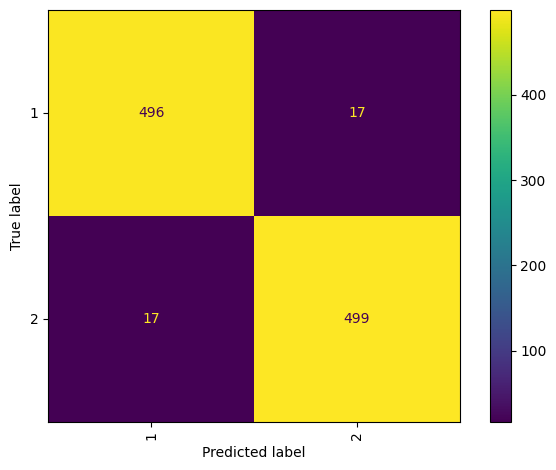

In [6]:
# SETUP & RUN BAGGING GRIDSEARCH TRAINING & TESTING

ex = pipeBuild_ExtraTreesClassifier()

names=['Extra Trees']
pipes=[ex]


samples = np.arange(len(X_train[0,:]))

# iterate over classifiers
for j in range(len(names)):

    today = date.today()
    now = today.strftime("%b-%d-%Y")
    save_file = str(names[j]) + '-' + str(now) + '-HeatMap.png'

    grid_search = GridSearchCV(estimator=pipes[j][0], param_grid=pipes[j][1], scoring='neg_mean_squared_error',cv=5, verbose=1, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    score = grid_search.score(X_test, y_test)
    print("Best parameter (CV score=%0.3f):" % grid_search.best_score_)
    print(grid_search.best_params_)
    y_pred = grid_search.predict(X_test)
    print(classification_report(y_test, y_pred))
    ConfusionMatrixDisplay.from_estimator(grid_search, X_test, y_test, xticks_rotation="vertical")

plt.tight_layout()
plt.show()